In [1]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the produce dataset
organic = pd.read_csv('produce_dataset.csv')

In [3]:
# Drop the column of index from the previous table (no longer valid indices)
organic.drop('Unnamed: 0', axis =1, inplace=True)

In [4]:
# Dataset is ordered by user_id
organic.head(30)

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits
5,2,1,2168274,2,11,NaN,47766,Organic Avocado,2,0,24,fresh fruits
6,2,1,2168274,2,11,NaN,27966,Organic Raspberries,11,0,123,packaged vegetables fruits
7,2,1,2168274,2,11,NaN,13176,Bag of Organic Bananas,12,0,24,fresh fruits
8,2,1,2168274,2,11,NaN,45066,Honeycrisp Apple,13,0,24,fresh fruits
9,2,2,1501582,5,10,10.0,16797,Strawberries,1,0,24,fresh fruits


In [5]:
# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1


In [6]:
# Group the rows by user_id and add the previously initialized total_produce_purchased column (each row is 1)
# This returns a series with user_id, total_produce_purchased
user_total = organic.groupby('order_id')['total_produce_purchased'].sum()
user_total

order_id
1          4
2          3
3          3
5          7
9          4
          ..
3421077    3
3421078    2
3421080    2
3421082    2
3421083    1
Name: total_produce_purchased, Length: 2506247, dtype: int64

In [7]:
# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


In [8]:
# Group the rows by user_id and add the previously initialized organic? column (1 for organic, 0 for non-organic)
# This returns a series with user_id, organic?

user_organic = organic.groupby('order_id')['organic?'].sum()
user_organic

order_id
1          3
2          1
3          2
5          4
9          1
          ..
3421077    3
3421078    1
3421080    2
3421082    0
3421083    0
Name: organic?, Length: 2506247, dtype: int32

In [9]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
order_df = pd.concat([user_total, user_organic], axis=1).reset_index()
order_df

,order_id,total_produce_purchased,organic?
0,1,4,3
1,2,3,1
2,3,3,2
3,5,7,4
4,9,4,1
...,...,...,...
2506242,3421077,3,3
2506243,3421078,2,1
2506244,3421080,2,2
2506245,3421082,2,0


In [10]:
# Rename the organic? column to 'organic_produce_purchased'
order_df.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 
order_df

,order_id,total_produce_purchased,organic_produce_purchased
0,1,4,3
1,2,3,1
2,3,3,2
3,5,7,4
4,9,4,1
...,...,...,...
2506242,3421077,3,3
2506243,3421078,2,1
2506244,3421080,2,2
2506245,3421082,2,0


In [11]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased
order_df['organic_%'] = order_df['organic_produce_purchased']/order_df['total_produce_purchased']

In [12]:
order_df

,order_id,total_produce_purchased,organic_produce_purchased,organic_%
0,1,4,3,0.750000
1,2,3,1,0.333333
2,3,3,2,0.666667
3,5,7,4,0.571429
4,9,4,1,0.250000
...,...,...,...,...
2506242,3421077,3,3,1.000000
2506243,3421078,2,1,0.500000
2506244,3421080,2,2,1.000000
2506245,3421082,2,0,0.000000


In [13]:
df_merge_col = pd.merge(organic, order_df, on='order_id')

In [14]:
df_merge_col

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased_x,organic?,total_produce_purchased_y,organic_produce_purchased,organic_%
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,1,1,1.0
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,4,2,0.5
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,4,2,0.5
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,4,2,0.5
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,4,2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1,5,1,0.2
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0,5,1,0.2
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0,5,1,0.2
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0,1,0,0.0


In [15]:
group = df_merge_col.groupby(['user_id', 'order_number'])['organic_%'].mean()
group
group1 = df_merge_col.groupby('order_number')['organic_%'].mean()
df_byorder = pd.merge(df_merge_col, group1, on='order_number')

In [46]:
group = df_merge_col.groupby(['order_number'])['user_id'].nunique()
group

order_number
1      150245
2      149655
3      149907
4      143596
5      128005
        ...  
96       1230
97       1164
98       1118
99       1070
100       681
Name: user_id, Length: 100, dtype: int64

In [49]:
group.head(50)

order_number
1     150245
2     149655
3     149907
4     143596
5     128005
6     115006
7     104148
8      94793
9      86963
10     80067
11     73674
12     68246
13     63650
14     59082
15     55109
16     51454
17     48098
18     45403
19     42601
20     40019
21     37875
22     35798
23     33806
24     31835
25     30181
26     28603
27     27187
28     25766
29     24501
30     23239
31     22194
32     21184
33     20079
34     19121
35     18277
36     17271
37     16521
38     15774
39     15023
40     14468
41     13797
42     13067
43     12453
44     11871
45     11305
46     10828
47     10226
48      9792
49      9338
50      8790
Name: user_id, dtype: int64

In [51]:
plt.figure(group['order_number'])

KeyError: 'order_number'

In [37]:
df_byorder.tail(30)

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased_x,organic?,total_produce_purchased_y,organic_produce_purchased,organic_%_x,organic_%_y
9888348,203362,100,2302720,4,17,4.0,41950,Organic Tomato Cluster,4,1,83,fresh vegetables,1,1,4,2,0.500000,0.621758
9888349,203362,100,2302720,4,17,4.0,31717,Organic Cilantro,8,1,16,fresh herbs,1,1,4,2,0.500000,0.621758
9888350,203362,100,2302720,4,17,4.0,17794,Carrots,9,0,83,fresh vegetables,1,0,4,2,0.500000,0.621758
9888351,204455,100,1547472,2,10,5.0,23165,Organic Leek,1,0,83,fresh vegetables,1,1,13,8,0.615385,0.621758
9888352,204455,100,1547472,2,10,5.0,13176,Bag of Organic Bananas,3,1,24,fresh fruits,1,1,13,8,0.615385,0.621758
9888353,204455,100,1547472,2,10,5.0,9839,Organic Broccoli,7,1,83,fresh vegetables,1,1,13,8,0.615385,0.621758
9888354,204455,100,1547472,2,10,5.0,39877,Organic Granny Smith Apple,9,1,24,fresh fruits,1,1,13,8,0.615385,0.621758
9888355,204455,100,1547472,2,10,5.0,26209,Limes,10,1,24,fresh fruits,1,0,13,8,0.615385,0.621758
9888356,204455,100,1547472,2,10,5.0,34358,Garlic,12,1,83,fresh vegetables,1,0,13,8,0.615385,0.621758
9888357,204455,100,1547472,2,10,5.0,21903,Organic Baby Spinach,13,1,123,packaged vegetables fruits,1,1,13,8,0.615385,0.621758


In [ ]:
df_byorder.groupby('')

Text(0.5, 1.05, 'User Order Number - Percentage of Organic Produce')

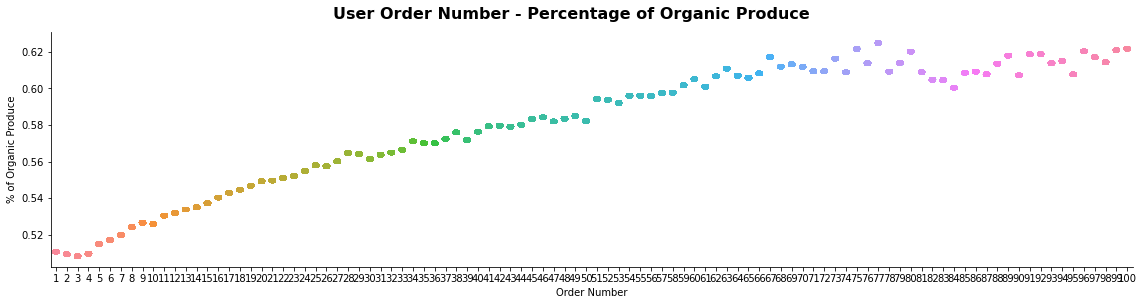

In [17]:
graph = sns.catplot(data = df_byorder, x='order_number', y='organic_%_y', height = 4, aspect = 4)
graph.set_axis_labels('Order Number', '% of Organic Produce')
graph.fig.suptitle('User Order Number - Percentage of Organic Produce', y=1.05, fontsize=16, fontweight='bold')

In [18]:
group

user_id  order_number
1        2               1.00
         5               0.50
2        1               0.75
         2               0.50
         3               1.00
                         ... 
206209   10              0.00
         11              0.00
         12              0.20
         13              0.00
         14              0.00
Name: organic_%, Length: 2506247, dtype: float64

In [22]:
new_df = pd.merge(df_merge_col, group,  how='left', left_on=['user_id', 'order_number'], right_on = ['user_id', 'order_number'])
new_df

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased_x,organic?,total_produce_purchased_y,organic_produce_purchased,organic_%_x,organic_%_y
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,1,1,1.0,1.0
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,4,2,0.5,0.5
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,4,2,0.5,0.5
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,4,2,0.5,0.5
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,4,2,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1,5,1,0.2,0.2
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0,5,1,0.2,0.2
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0,5,1,0.2,0.2
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0,1,0,0.0,0.0


Text(0.5, 1.05, 'User Order Number - Percentage of Organic Produce')

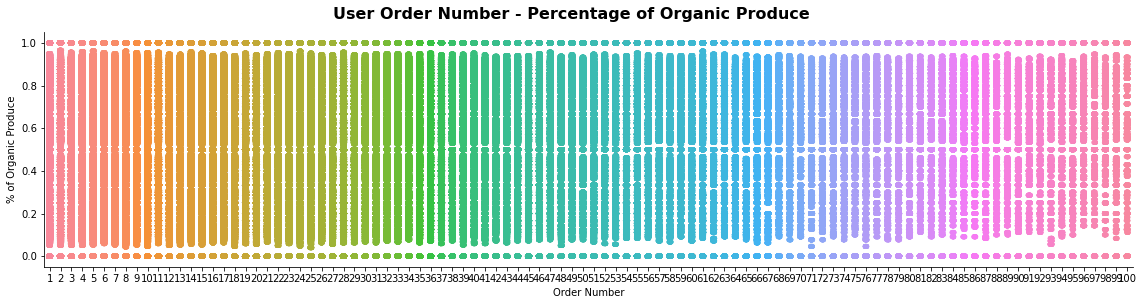

In [23]:
graph = sns.catplot(data = new_df, x='order_number', y='organic_%_y', height = 4, aspect = 4)
graph.set_axis_labels('Order Number', '% of Organic Produce')
graph.fig.suptitle('User Order Number - Percentage of Organic Produce', y=1.05, fontsize=16, fontweight='bold')

In [52]:
new_df['seg'] = None

new_df.loc[new_df['organic_%_x'] < 0.1, 'seg'] = 'No Organics'
new_df.loc[(new_df['organic_%_x'] >= 0.1) & (new_df['organic_%_x'] < 0.5), 'seg'] = 'Light Organics'
new_df.loc[(new_df['organic_%_x'] >= 0.5) & (new_df['organic_%_x'] < 0.75), 'seg'] = 'Moderate Organics'
new_df.loc[(new_df['organic_%_x'] >= 0.75) & (new_df['organic_%_x'] < 1), 'seg'] = 'Heavy Organics'
new_df.loc[(new_df['organic_%_x'] == 1), 'seg'] = 'All Organics'

new_df.head(30)

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased_x,organic?,total_produce_purchased_y,organic_produce_purchased,organic_%_x,organic_%_y,seg
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1,1,1,1.000000,1.000000,All Organics
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1,4,2,0.500000,0.500000,Moderate Organics
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0,4,2,0.500000,0.500000,Moderate Organics
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0,4,2,0.500000,0.500000,Moderate Organics
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1,4,2,0.500000,0.500000,Moderate Organics
5,2,1,2168274,2,11,NaN,47766,Organic Avocado,2,0,24,fresh fruits,1,1,4,3,0.750000,0.750000,Heavy Organics
6,2,1,2168274,2,11,NaN,27966,Organic Raspberries,11,0,123,packaged vegetables fruits,1,1,4,3,0.750000,0.750000,Heavy Organics
7,2,1,2168274,2,11,NaN,13176,Bag of Organic Bananas,12,0,24,fresh fruits,1,1,4,3,0.750000,0.750000,Heavy Organics
8,2,1,2168274,2,11,NaN,45066,Honeycrisp Apple,13,0,24,fresh fruits,1,0,4,3,0.750000,0.750000,Heavy Organics
9,2,2,1501582,5,10,10.0,16797,Strawberries,1,0,24,fresh fruits,1,0,2,1,0.500000,0.500000,Moderate Organics


(array([1346535.,       0., 3178304.,       0.,       0., 1655983.,
              0., 2443045.,       0., 1264511.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

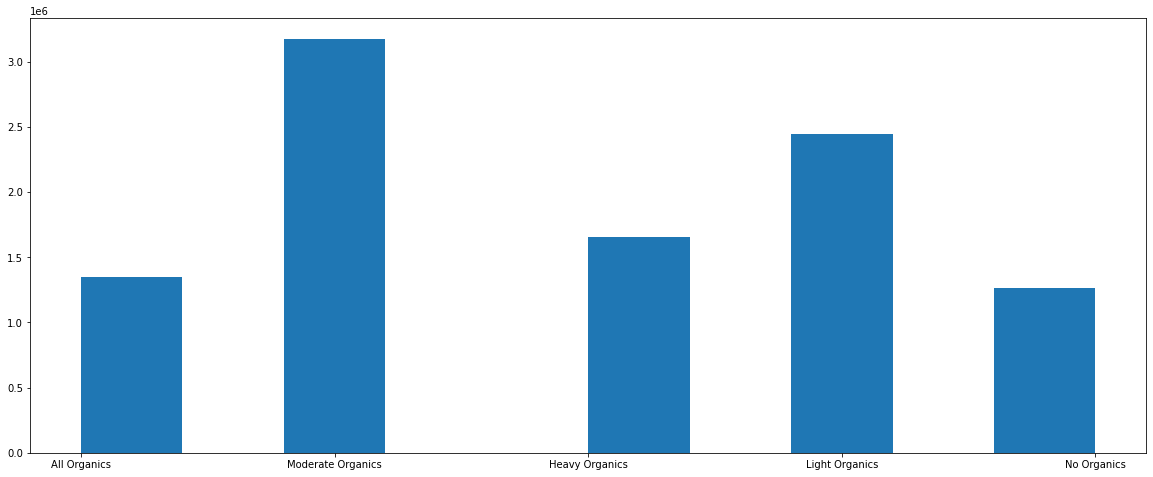

In [53]:
plt.figure(figsize=(20,8))

plt.hist(new_df['seg'])


# graph = sns.catplot(data = new_df, x='seg', height = 4, aspect = 4)
# graph.set_axis_labels('Order Number', '% of Organic Produce')
# graph.fig.suptitle('User Order Number - Percentage of Organic Produce', y=1.05, fontsize=16, fontweight='bold')

In [ ]:
# segmentation and number of orders relationship LOOK DOWN

In [53]:
# Create a new 'segment' column and initialize it with None
user_df['segment'] = None

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_df.loc[user_df['organic_%'] < 0.01, 'segment'] = 'Never Organic'
user_df.loc[(user_df['organic_%'] >= 0.01) & (user_df['organic_%'] < 0.25), 'segment'] = 'Organic Taster'
user_df.loc[(user_df['organic_%'] >= 0.25) & (user_df['organic_%'] < 0.50), 'segment'] = 'Light Organic'
user_df.loc[user_df['organic_%'] >= 0.50, 'segment'] = 'Super Organic'

In [54]:
user_df

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment
0,1,5,3,0.600000,Super Organic
1,2,43,21,0.488372,Light Organic
2,3,38,23,0.605263,Super Organic
3,4,2,2,1.000000,Super Organic
4,5,23,15,0.652174,Super Organic
...,...,...,...,...,...
194326,206205,14,7,0.500000,Super Organic
194327,206206,34,27,0.794118,Super Organic
194328,206207,50,47,0.940000,Super Organic
194329,206208,197,154,0.781726,Super Organic


In [55]:
# Filter the user dataframe by removing all users with total produce purchased <10
df_filtered = user_df[user_df['total_produce_purchased'] > 9] 
df_filtered

,user_id,total_produce_purchased,organic_produce_purchased,organic_%,segment
1,2,43,21,0.488372,Light Organic
2,3,38,23,0.605263,Super Organic
4,5,23,15,0.652174,Super Organic
6,7,58,35,0.603448,Super Organic
7,8,40,20,0.500000,Super Organic
...,...,...,...,...,...
194326,206205,14,7,0.500000,Super Organic
194327,206206,34,27,0.794118,Super Organic
194328,206207,50,47,0.940000,Super Organic
194329,206208,197,154,0.781726,Super Organic


In [56]:
# Check the segments
df_filtered['segment'].unique()

array(['Light Organic', 'Super Organic', 'Organic Taster',
       'Never Organic'], dtype=object)

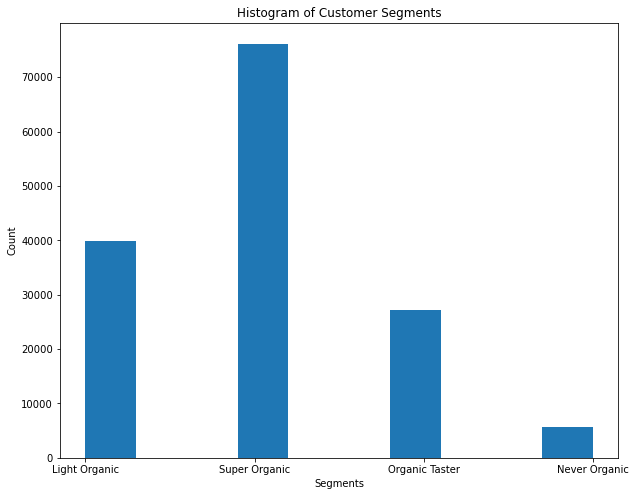

In [57]:
# Plot the count of each segment

plt.figure(figsize=(10,8))

plt.hist(df_filtered['segment'])

plt.title('Histogram of Customer Segments')
plt.xlabel('Segments')
plt.ylabel('Count')

pass

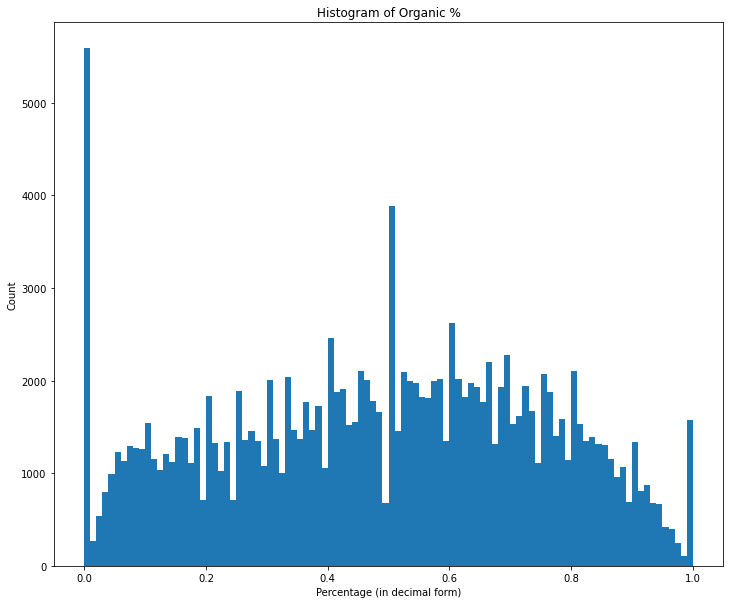

In [58]:
# Plot the histogram of percentage organic from 0-1
plt.figure(figsize=(12,10))

plt.hist(df_filtered['organic_%'], bins = 100)

plt.title('Histogram of Organic %')
plt.xlabel('Percentage (in decimal form)')
plt.ylabel('Count')

pass

### NEEDS FIXIN!


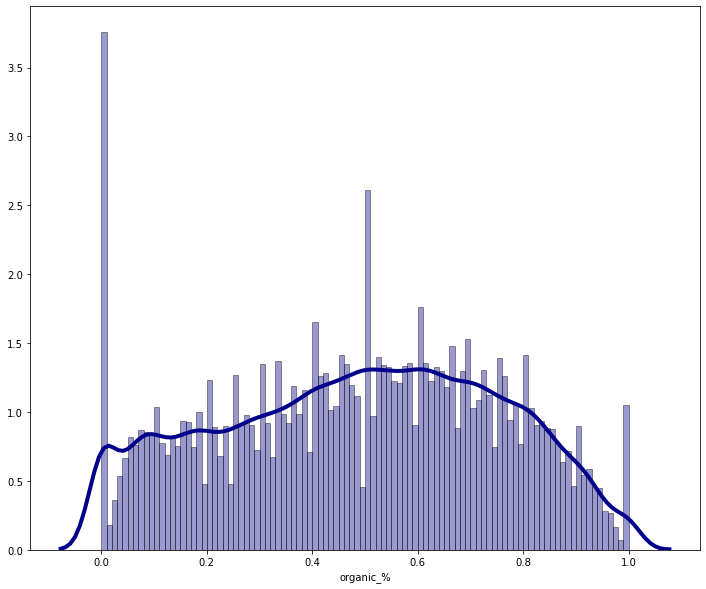

In [59]:
# Plot the density of percentage organic distribution from 0-1

plt.figure(figsize=(12,10))

sns.distplot(df_filtered['organic_%'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
pass

In [60]:
order_total = organic.groupby('order_id')['organic?'].count()
order_organic = organic.groupby('order_id')['organic?'].sum()
order_percent = user_organic / user_total

order_df = pd.concat([order_total, order_organic, order_percent], axis=1).reset_index()
order_df

,index,organic?,organic?,0
0,1,4.0,3.0,0.600000
1,2,3.0,1.0,0.488372
2,3,3.0,2.0,0.605263
3,4,NaN,NaN,1.000000
4,5,7.0,4.0,0.652174
...,...,...,...,...
2558442,3421077,3.0,3.0,NaN
2558443,3421078,2.0,1.0,NaN
2558444,3421080,2.0,2.0,NaN
2558445,3421082,2.0,0.0,NaN
